In [1]:
import numpy as np
import pandas as pd
from astropy.table import Table
import cPickle

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
table1 = pd.read_csv("../GZ2ASSETS_NAIR_MORPH_MAIN.csv", usecols=np.arange(0,31,1))
table2 = pd.read_csv("../gz2sample.csv")

In [25]:
table2.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'OBJID', u'RUN', u'RERUN', u'CAMCOL',
       u'FIELD', u'OBJ', u'RA', u'DEC', u'PETROR50_R', u'PETROR90_R',
       u'PETROMAG_U', u'PETROMAG_G', u'PETROMAG_R', u'PETROMAG_I',
       u'PETROMAG_Z', u'PETROMAGERR_U', u'PETROMAGERR_G', u'PETROMAGERR_R',
       u'PETROMAGERR_I', u'PETROMAGERR_Z', u'PSFMAG_R', u'FIBERMAG_R',
       u'DEVMAG_R', u'DEVMAGERR_R', u'EXPMAG_R', u'EXPMAGERR_R', u'FRACDEV_R',
       u'MU50_R', u'EXTINCTION_U', u'EXTINCTION_G', u'EXTINCTION_R',
       u'EXTINCTION_I', u'EXTINCTION_Z', u'ROWC_U', u'COLC_U', u'ROWC_G',
       u'COLC_G', u'ROWC_R', u'COLC_R', u'ROWC_I', u'COLC_I', u'ROWC_Z',
       u'COLC_Z', u'CMODELMAG_R', u'CMODELMAGERR_R', u'REDSHIFT',
       u'REDSHIFTERR', u'PETROMAG_MU', u'PETROMAG_MG', u'PETROMAG_MR',
       u'PETROMAG_MI', u'PETROMAG_MZ', u'PETROMAGERR_MU', u'PETROMAGERR_MG',
       u'PETROMAGERR_MR', u'PETROMAGERR_MI', u'PETROMAGERR_MZ',
       u'PETROR50_R_KPC', u'REGION', u'PETROR50_R_KPC_SIMPLE_BIN'

In [ ]:
table3 = pd.read_csv("../missing_from_cutouts.csv", dtype='int64')
table3 = table3.rename(index=str, columns={'objid':'OBJID'})

table4 = Table.read("../SDSSmorphology_full_catalog_92415.fits").to_pandas()

In [ ]:
table4= table4.rename(index=str, columns={'objid':'OBJID'})

In [ ]:
print len(table4)
#print table4['OBJID']
#print table1[table1['name']==587730845812064684]

In [ ]:
table1['OBJID'] = table1['name'].copy()

In [ ]:
table = pd.merge(table1, table2, on='OBJID')

In [ ]:
print len(table4)
print table4.columns

### Which morphology indicators did I settle on? 
Perfect correlation with table3 above: `SDSSmorphology_full_catalog_92415.fits` morphology indicators measured with elliptical apertures. 

In [ ]:
print table1.columns
print table4.columns
print len(table1), len(table4)


In [ ]:
test = pd.merge(table1, table4, on=['OBJID'])

In [ ]:
# What we started with - what we have after the merge
# The twelve are likely those S82 objects that snuck into the main sample :(
282350-282338

In [ ]:
test.columns

In [ ]:
plt.scatter(test.C_x, test.C_y)
plt.scatter(test.M20_x, test.M20_y)
plt.scatter(test.A_x, test.A_y)
plt.scatter(test.G_x, test.G_y)

### Selecting samples for Clean Image examples
Estimated the source density for every cutout I made by counting the number of objects in the resulting SExtractor catalog (bright run). Took this value and divided by the area of the image in arcsec (which itself was estimated as ($4\times(2\times r_{\mathrm{Petro}}))^2$)

In [ ]:
#plt.hist(table4.cat,bins=np.arange(0,9,1))

In [10]:
table2['source_density'] = table2['bright_count']/(4*2*table2['PETROR90_R'].values)**2

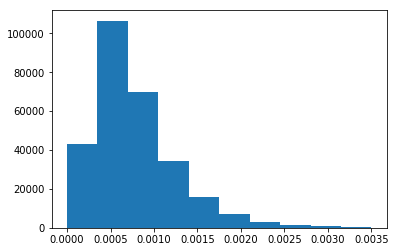

In [14]:
h, bins, _ = plt.hist(table2['source_density'].values, range=(0,0.0035))

In [37]:
for i in range(len(bins)-1):
    objects = table2[(table2['source_density']>bins[i]) & 
                     (table2['source_density']<bins[i+1])]
    idx = np.random.choice(objects['Unnamed: 0'], size=10, replace=False, p=None)
    sample = objects.loc[idx]
    
    print sample[ 'OBJID']

215992    587742774014574744
259715    588017625610518761
175831    587739845384143015
123648    587736809373565125
255242    588017565489692734
231290    588010137337462892
24984     587727943493484716
264677    588017704008351829
146727    587739130805026984
152874    587739380984774779
Name: OBJID, dtype: int64
271891    588017948273868944
175138    587739844309614697
139048    587738569246572621
148993    587739157657813100
190806    587741724963700827
273619    588017977815793801
59541     587731513141166168
250903    588016840710225938
263819    588017703471939661
169271    587739721898000532
Name: OBJID, dtype: int64
261002    588017627223425127
32827     587729150916493474
210372    587742577515888730
221568    587745243082719480
18936     587726031182758080
157420    587739408375087286
156717    587739407836774602
41477     587729653965128046
29854     587728907175592203
128312    587736946812584133
Name: OBJID, dtype: int64
128965    587736975809511459
136473    5877383722093

### Measured morphologies on how many galaxies?

In [ ]:
print "What Morphologies was I able to Measure?"

print "All GZ2:", len(table)
#print "All GZ2 (published):", len(table[''])
print "Petrosian radius:", len(table['Rp'].dropna())
print "Concentration:", len(table['C'].dropna())
print "M20:", len(table['M20'].dropna())
print "A:", len(table['A'].dropna())
print "Gini:", len(table['G'].dropna())
print "elipt:", len(table['elipt'].dropna())

In [ ]:
table[['OBJID','A']]

In [ ]:
print np.min(table['REDSHIFT']), np.max(table['REDSHIFT'])

In [ ]:
plt.hist(table['REDSHIFT_SIMPLE_BIN'], range=(0, 20))

In [ ]:
zbins = np.unique(table['REDSHIFT_SIMPLE_BIN'])[2:-1]
print zbins

In [ ]:
sample = [np.random.choice(table["OBJID"][table['REDSHIFT_SIMPLE_BIN'] == n]) for n in zbins]

In [ ]:
sample